In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data



In [2]:
yelp=pd.read_csv('./Downloads/Github/yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp['text length']=yelp['text'].apply(len)

# Exploratory Data Analysis

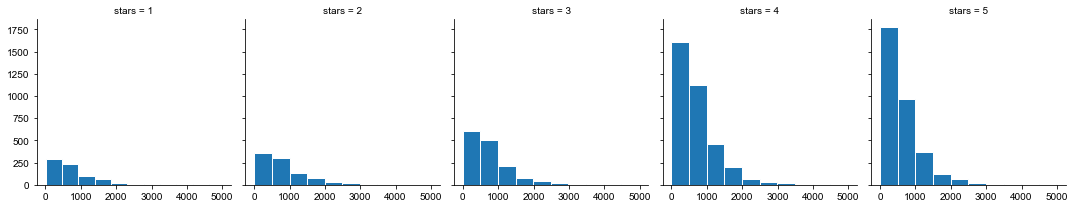

In [7]:
g=sns.FacetGrid(data=yelp,col='stars')
sns.set_style('whitegrid')
g.map_dataframe(plt.hist,x='text length',bins=10)

**Using FacetGrid to create a grid of 5 histograms of text length based off of the star ratings.**

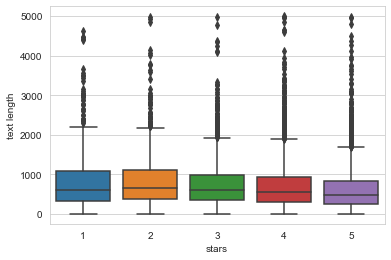

In [8]:
sns.boxplot(y='text length', x='stars',data=yelp)

**Boxplot of text length for each star category.**

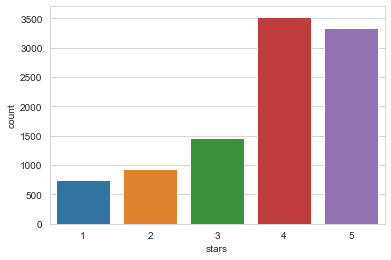

In [9]:
sns.countplot(x='stars',data=yelp)

**Countplot of the number of occurrences for each type of star rating.**

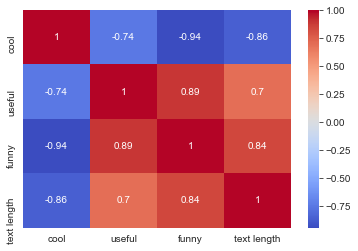

In [10]:
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap='coolwarm',annot=True)

**HeatMap of Correlation of other attributes in dataframe with text length **

## Data Preprocessing 

**Removing punctuations and stopwords**

In [27]:
yelp_class=yelp[(yelp.stars==1) | (yelp.stars==5)]

In [28]:
import string
from nltk.corpus import stopwords
def data_preproc(text):
    no_punc_wd=[ c for c in text if c not in string.punctuation]
    no_punc_wd=''.join(no_punc_wd)
    no_punc_conwd=[ c for c in no_punc_wd.split() if c.lower() not in stopwords.words('english')]
    no_punc_conwd=' '.join(no_punc_conwd)
    return no_punc_conwd

yelp_class['text']=yelp_class['text'].apply(data_preproc)

<ipython-input-28-28417a53dbd5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_class['text']=yelp_class['text'].apply(data_preproc)


In [30]:
X=yelp_class.text
y=yelp_class.stars

## NLP Classification Task


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
Count_Vec=CountVectorizer()

In [32]:
X=Count_Vec.fit_transform(X)

## Train Test Split


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model


In [36]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [37]:
nb.fit(X_train,y_train)

MultinomialNB()

## Evaluation of Model


In [38]:
predictions=nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.85      0.72      0.78       228
           5       0.94      0.97      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.85      0.87      1226
weighted avg       0.92      0.93      0.92      1226



[[165  63]
 [ 28 970]]
